<a href="https://colab.research.google.com/github/aldder/MachineLearning/blob/master/Convolutional_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Conv2DTranspose, Flatten, Dense, Reshape, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import fashion_mnist
tf.__version__

'2.1.0'

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

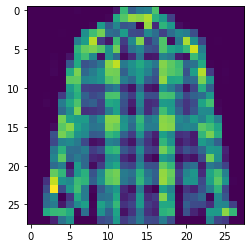

In [5]:
plt.imshow(x_train[235]);

In [6]:
x_train = x_train / 255.
x_test = x_test / 255.
print(x_train.shape)

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
print(x_train.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [10]:
tf.keras.backend.clear_session()

encoder = Sequential(name='encoder')
encoder.add(InputLayer(input_shape=(28,28,1)))
encoder.add(Conv2D(64, (3,3), padding='same', activation='relu'))
encoder.add(MaxPooling2D(padding='same'))
encoder.add(Conv2D(128, (3,3), padding='same', activation='relu'))
encoder.add(MaxPooling2D(padding='same'))
encoder.add(Flatten())
encoder.add(Dense(1024, activation='relu'))


decoder = Sequential(name='decoder')
decoder.add(InputLayer((1024,)))
decoder.add(Dense(7*7*128, activation='relu'))
decoder.add(Reshape((7,7,128)))
decoder.add(Conv2DTranspose(64, (3, 3), strides=2, activation='relu', padding='same'))
decoder.add(Conv2DTranspose(1, (3, 3), strides=2, activation=None, padding='same'))

autoencoder_input = Input((28,28,1))
autoencoder_encoder = encoder(autoencoder_input)
autoencoder_decoder = decoder(autoencoder_encoder)
autoencoder = Model(inputs=autoencoder_input, outputs=autoencoder_decoder, name='autoencoder')
autoencoder.compile(loss='mse', optimizer='adam')

print(encoder.summary())
print(decoder.summary())
print(autoencoder.summary())

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              6423552   
Total params: 6,498,048
Trainable params: 6,498,048
Non-trainable params: 0
_________________________________________________

In [11]:
autoencoder.fit(x_train, x_train, epochs=10, verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 316us/sample - loss: 0.0120
Epoch 2/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.0061
Epoch 3/10
60000/60000 [==============================] - 12s 201us/sample - loss: 0.0049
Epoch 4/10
60000/60000 [==============================] - 12s 205us/sample - loss: 0.0042
Epoch 5/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.0037
Epoch 6/10
60000/60000 [==============================] - 12s 204us/sample - loss: 0.0034
Epoch 7/10
60000/60000 [==============================] - 12s 202us/sample - loss: 0.0031
Epoch 8/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0029
Epoch 9/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0027
Epoch 10/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.0026


In [12]:
autoencoder.evaluate(x_test, x_test, verbose=1)

10000/10000 [==============================] - 1s 113us/sample - loss: 0.0030


0.0029767795797437427

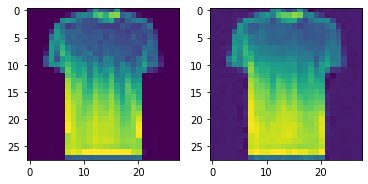

In [14]:
plt.subplot(1,2,1)
plt.imshow(x_test[235].reshape(28,28) * 255.)
plt.subplot(1,2,2)
plt.imshow(autoencoder.predict(x_test)[235].reshape(28,28) * 255.);